In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [8]:
df = pd.read_csv('sonar.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
df.shape

(208, 61)

In [13]:
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

In [14]:
df.duplicated().sum()

0

In [16]:
df.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [18]:
df[60].value_counts()
# M - Mines
# R - Rocks

M    111
R     97
Name: 60, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb = LabelEncoder()
df[60] = lb.fit_transform(df[60])

In [20]:
df[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

In [22]:
df.dtypes.value_counts()

float64    60
int32       1
dtype: int64

#### Split the data

In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(208, 60)
(208,)


In [25]:
x.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078


In [27]:
y.sample(5)

139    0
32     1
148    0
53     1
131    0
Name: 60, dtype: int32

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 60)
(52, 60)
(156,)
(52,)


### Model - 1 (without Dropout Layer)

In [29]:
m1 = Sequential()
m1.add(Dense(60,activation='relu',input_dim=60))
m1.add(Dense(30,activation='relu'))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=35)

Epoch 1/35
5/5 [==============================] - 5s 342ms/step - loss: 0.6783 - accuracy: 0.5641 - val_loss: 0.6548 - val_accuracy: 0.6538
Epoch 2/35
5/5 [==============================] - 0s 41ms/step - loss: 0.6609 - accuracy: 0.6026 - val_loss: 0.6457 - val_accuracy: 0.6538
Epoch 3/35
5/5 [==============================] - 0s 57ms/step - loss: 0.6497 - accuracy: 0.6218 - val_loss: 0.6353 - val_accuracy: 0.7308
Epoch 4/35
5/5 [==============================] - 0s 39ms/step - loss: 0.6390 - accuracy: 0.6410 - val_loss: 0.6264 - val_accuracy: 0.7308
Epoch 5/35
5/5 [==============================] - 0s 37ms/step - loss: 0.6282 - accuracy: 0.6667 - val_loss: 0.6175 - val_accuracy: 0.7308
Epoch 6/35
5/5 [==============================] - 0s 40ms/step - loss: 0.6180 - accuracy: 0.6923 - val_loss: 0.6069 - val_accuracy: 0.7500
Epoch 7/35
5/5 [==============================] - 0s 38ms/step - loss: 0.6076 - accuracy: 0.6923 - val_loss: 0.5974 - val_accuracy: 0.7500
Epoch 8/35
5/5 [==========

In [32]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
30,0.391368,0.852564,0.378036,0.826923,30
31,0.382112,0.820513,0.377956,0.826923,31
32,0.374805,0.826923,0.368980,0.826923,32
33,0.373353,0.858974,0.367294,0.846154,33
34,0.363539,0.858974,0.360375,0.807692,34


#### Overfitting
1) Models with high vraiance and low bias
2) Model performs well on the training data and comparatilvely porrly on the test data

#### Regularization
1) It is atechnique to prevent overfitting

#### Dropout Layer
1) Dropout is a regularization technqiue for NN<br>
2) It is technique where model randomly selects neurons and these randomly selected nuerons are dropped(ignored). They are dropped out randomly. This means their contribution to the activation of downstream neurons is temporarily removed on forward propagation and any weight update are not applied to the neron on the backward pass.

### Model - 2 (with Dropout Layer)

In [33]:
m2 = Sequential()
m2.add(Dense(60,activation='relu',input_dim=60))
m2.add(Dropout(0.3))
m2.add(Dense(30,activation='relu'))
m2.add(Dropout(0.3))
m2.add(Dense(1,activation='sigmoid'))

m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
h2 = m2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=35)

Epoch 1/35
5/5 [==============================] - 5s 303ms/step - loss: 0.6959 - accuracy: 0.4936 - val_loss: 0.6871 - val_accuracy: 0.5577
Epoch 2/35
5/5 [==============================] - 0s 56ms/step - loss: 0.6770 - accuracy: 0.5577 - val_loss: 0.6827 - val_accuracy: 0.5577
Epoch 3/35
5/5 [==============================] - 0s 50ms/step - loss: 0.6836 - accuracy: 0.6026 - val_loss: 0.6766 - val_accuracy: 0.5962
Epoch 4/35
5/5 [==============================] - 0s 59ms/step - loss: 0.6623 - accuracy: 0.6218 - val_loss: 0.6699 - val_accuracy: 0.5577
Epoch 5/35
5/5 [==============================] - 0s 56ms/step - loss: 0.6623 - accuracy: 0.5705 - val_loss: 0.6637 - val_accuracy: 0.5385
Epoch 6/35
5/5 [==============================] - 0s 39ms/step - loss: 0.6548 - accuracy: 0.6346 - val_loss: 0.6566 - val_accuracy: 0.6154
Epoch 7/35
5/5 [==============================] - 0s 34ms/step - loss: 0.6567 - accuracy: 0.5897 - val_loss: 0.6489 - val_accuracy: 0.6538
Epoch 8/35
5/5 [==========

In [35]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
30,0.487211,0.762821,0.451853,0.750000,30
31,0.496985,0.756410,0.446544,0.769231,31
32,0.504006,0.750000,0.443019,0.730769,32
33,0.444533,0.775641,0.437976,0.730769,33
34,0.456997,0.801282,0.428534,0.750000,34


### Callbacks

#### EarlyStooping Callback
1) It is another regularization technique<br>
2) Too many epochs can lead to overfitting on the training data, whereas too few epochs may result in an underfit model. EarlyStopping is a method that allows  you to specify an aribary large number of training epochs and stop the training of the model when the model's performance stops improving after a partcular patience level is reached (Ex - when val_loss is no longer getting reduced)<br>

In [36]:
from sklearn.datasets import make_moons

In [49]:
x,y = make_moons(n_samples=100,noise=0.2)
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [50]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
print(x[:5])

[[ 0.1357917   1.1281158 ]
 [ 0.1465425  -0.28735626]
 [ 0.71720791  0.43985768]
 [ 0.56197236  1.20179473]
 [ 1.98261874  0.32594058]]


In [52]:
print(y[:10])

[0 1 0 0 1 0 1 0 1 0]


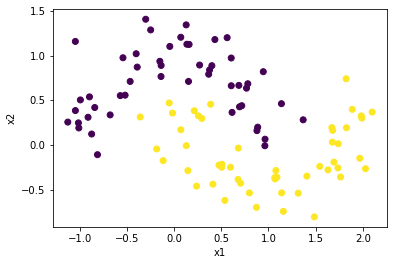

In [54]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [64]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.25)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(75, 2)
(25, 2)
(75,)
(25,)


### Model Building

In [60]:
m2_moons = Sequential()
m2_moons.add(Dense(100,activation='relu',input_dim=2))
m2_moons.add(Dense(50,activation='relu'))
m2_moons.add(Dense(1,activation='sigmoid'))

m2_moons.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
es = EarlyStopping(monitor='val_loss',patience=4)

In [65]:
h2_moons = m2_moons.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),
                        epochs=100,callbacks=[es])

Epoch 1/100
3/3 [==============================] - 4s 567ms/step - loss: 0.6838 - accuracy: 0.6000 - val_loss: 0.6485 - val_accuracy: 0.8000
Epoch 2/100
3/3 [==============================] - 0s 95ms/step - loss: 0.6350 - accuracy: 0.8133 - val_loss: 0.6133 - val_accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 0s 66ms/step - loss: 0.5917 - accuracy: 0.8267 - val_loss: 0.5815 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 63ms/step - loss: 0.5555 - accuracy: 0.8133 - val_loss: 0.5528 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 74ms/step - loss: 0.5231 - accuracy: 0.8133 - val_loss: 0.5272 - val_accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 0s 62ms/step - loss: 0.4938 - accuracy: 0.8133 - val_loss: 0.5041 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 0s 68ms/step - loss: 0.4686 - accuracy: 0.8133 - val_loss: 0.4825 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

In [66]:
r2_moons = pd.DataFrame(h2_moons.history)
r2_moons['Epcohs'] = h2_moons.epoch
r2_moons.tail(7)

,loss,accuracy,val_loss,val_accuracy,Epcohs
26,0.288043,0.853333,0.316600,0.84,26
27,0.284906,0.853333,0.313130,0.84,27
28,0.283218,0.853333,0.311312,0.84,28
29,0.280856,0.853333,0.312684,0.84,29
30,0.278117,0.853333,0.312684,0.84,30
31,0.275821,0.853333,0.313966,0.84,31
32,0.274818,0.853333,0.316309,0.84,32


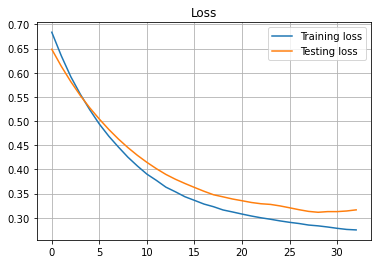

In [68]:
plt.plot(r2_moons['Epcohs'],r2_moons['loss'],label='Training loss')
plt.plot(r2_moons['Epcohs'],r2_moons['val_loss'],label='Testing loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

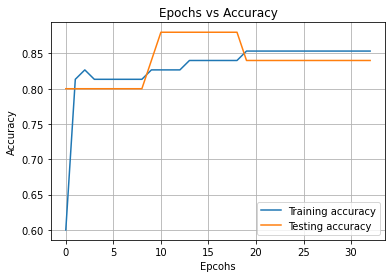

In [69]:
plt.plot(r2_moons['Epcohs'],r2_moons['accuracy'],label='Training accuracy')
plt.plot(r2_moons['Epcohs'],r2_moons['val_accuracy'],label='Testing accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [72]:
ypred_m2_moons = m2_moons.predict(x_test2)
print(ypred_m2_moons)

[[0.05033463]
 [0.05601725]
 [0.10194248]
 [0.61806303]
 [0.03247666]
 [0.30620164]
 [0.18490237]
 [0.9678253 ]
 [0.72954774]
 [0.07463399]
 [0.9335668 ]
 [0.8013202 ]
 [0.6350776 ]
 [0.9706733 ]
 [0.85880405]
 [0.28576648]
 [0.813161  ]
 [0.26071456]
 [0.13137531]
 [0.48642653]
 [0.06614754]
 [0.07479128]
 [0.34446517]
 [0.9559003 ]
 [0.60974693]]


In [73]:
ypred_moons = [1 if i>0.5 else 0 for i in ypred_m2_moons]
print(ypred_moons)

[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]


In [75]:
print(y_test2)

[0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1]


In [77]:
cm2 = confusion_matrix(y_test2,ypred_moons)
print(cm2)
print(classification_report(y_test2,ypred_moons))

[[11  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.91      0.77      0.83        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

